# Proyecto

#### Parate de los pasos que vas a realizar para el datacleaning

**Librerias**

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('ggplot')
#ingorar errores
import warnings
warnings.simplefilter("ignore")

pd.set_option('display.max_columns', 54)#Desplegar columnas para verlas todas

## Carga de datos

In [3]:
df = pd.read_csv('modeling_data.csv', sep=';', low_memory=False)

In [4]:
# las primeras 5 columnas
df.head()

,ID_CLIENT,CLERK_TYPE,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL,STATE_OF_BIRTH,CITY_OF_BIRTH,NACIONALITY,RESIDENCIAL_STATE,RESIDENCIAL_CITY,RESIDENCIAL_BOROUGH,FLAG_RESIDENCIAL_PHONE,RESIDENCIAL_PHONE_AREA_CODE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_MOBILE_PHONE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,PROFESSIONAL_STATE,PROFESSIONAL_CITY,PROFESSIONAL_BOROUGH,FLAG_PROFESSIONAL_PHONE,PROFESSIONAL_PHONE_AREA_CODE,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,MATE_PROFESSION_CODE,EDUCATION_LEVEL.1,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,FLAG_ACSP_RECORD,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL_BAD=1
0,1,C,5,Web,0,1,F,6,1,0,RN,Assu,1,RN,Santana do Matos,Centro,Y,105,1.0,15.0,N,1,900.0,0.0,1,1,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,9.0,4.0,NaN,NaN,0,0,0,0,1,N,32,595,595,1
1,2,C,15,Carga,0,1,F,2,0,0,RJ,rio de janeiro,1,RJ,RIO DE JANEIRO,CAMPO GRANDE,Y,20,1.0,1.0,N,1,750.0,0.0,0,0,0,0,0,0,0,0.0,0,Y,,NaN,NaN,N,,0,11.0,4.0,11.0,NaN,0,0,0,0,1,N,34,230,230,1
2,3,C,5,Web,0,1,F,2,0,0,RN,GARANHUNS,1,RN,Parnamirim,Boa Esperanca,Y,105,1.0,NaN,N,1,500.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,11.0,NaN,NaN,NaN,0,0,0,0,1,N,27,591,591,0
3,4,C,20,Web,0,1,F,2,0,0,PE,CABO,1,PE,CABO,PONTE DOS CARVALHOS,N,,NaN,NaN,N,1,500.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,NaN,NaN,NaN,NaN,0,0,0,0,1,N,61,545,545,0
4,5,C,10,Web,0,1,M,2,0,0,RJ,RIO DE JANEIRO,1,RJ,Rio de Janeiro,Santa Cruz,Y,20,1.0,12.0,N,1,1200.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,9.0,5.0,NaN,NaN,0,0,0,0,1,N,48,235,235,1


In [5]:
#dimesión de los datos
df.shape

(50000, 54)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID_CLIENT                       50000 non-null  int64  
 1   CLERK_TYPE                      50000 non-null  object 
 2   PAYMENT_DAY                     50000 non-null  int64  
 3   APPLICATION_SUBMISSION_TYPE     50000 non-null  object 
 4   QUANT_ADDITIONAL_CARDS          50000 non-null  int64  
 5   POSTAL_ADDRESS_TYPE             50000 non-null  int64  
 6   SEX                             50000 non-null  object 
 7   MARITAL_STATUS                  50000 non-null  int64  
 8   QUANT_DEPENDANTS                50000 non-null  int64  
 9   EDUCATION_LEVEL                 50000 non-null  int64  
 10  STATE_OF_BIRTH                  50000 non-null  object 
 11  CITY_OF_BIRTH                   50000 non-null  object 
 12  NACIONALITY                     

In [7]:
#verificar datos nulos
nulos= df.isnull().mean()*100 # en porciento

#Filtar solo los nulos
nulos[nulos>0].index

Index(['RESIDENCE_TYPE', 'MONTHS_IN_RESIDENCE', 'PROFESSIONAL_CITY',
       'PROFESSIONAL_BOROUGH', 'PROFESSION_CODE', 'OCCUPATION_TYPE',
       'MATE_PROFESSION_CODE', 'EDUCATION_LEVEL.1'],
      dtype='object')

Las columnas con el mayor % deben de ser eliminadas. las demás se deben llenar
- columnas a eliminar: 
```python
['PROFESSIONAL_CITY', 'PROFESSIONAL_BOROUGH', 'MATE_PROFESSION_CODE','EDUCATION_LEVEL.1'] 
```

In [8]:
data = df.drop(['PROFESSIONAL_CITY', 'PROFESSIONAL_BOROUGH', 'MATE_PROFESSION_CODE','EDUCATION_LEVEL.1'], 
              axis=1).copy()

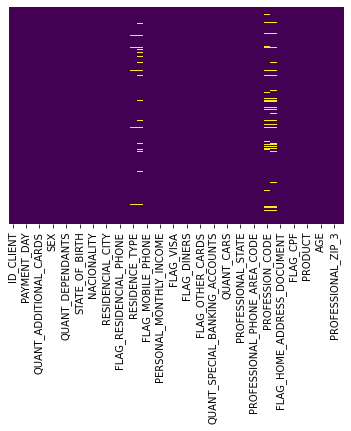

In [9]:
sns.heatmap(data.isnull(), cbar=False, yticklabels=False, cmap='viridis');

### Revisar columnas

In [10]:
obj_cols = data.select_dtypes('object').columns

In [11]:
data[obj_cols].nunique()

CLERK_TYPE                          1
APPLICATION_SUBMISSION_TYPE         3
SEX                                 4
STATE_OF_BIRTH                     29
CITY_OF_BIRTH                    9910
RESIDENCIAL_STATE                  27
RESIDENCIAL_CITY                 3529
RESIDENCIAL_BOROUGH             14511
FLAG_RESIDENCIAL_PHONE              2
RESIDENCIAL_PHONE_AREA_CODE       102
FLAG_MOBILE_PHONE                   1
COMPANY                             2
PROFESSIONAL_STATE                 28
FLAG_PROFESSIONAL_PHONE             2
PROFESSIONAL_PHONE_AREA_CODE       87
FLAG_ACSP_RECORD                    1
RESIDENCIAL_ZIP_3                 794
PROFESSIONAL_ZIP_3                794
dtype: int64

Las columnas que tienen una caracteristica pueden ser eliminadas o no tomadas en consideracion  a hora de seleccionar las variables

por igual la que sobrepasan los 10:
ejemplo-
1. CLERK_TYPE                          
1. STATE_OF_BIRTH                     
1. CITY_OF_BIRTH                    
1. RESIDENCIAL_STATE                  
1. RESIDENCIAL_CITY                
1. RESIDENCIAL_BOROUGH             
1. RESIDENCIAL_PHONE_AREA_CODE       
1. FLAG_MOBILE_PHONE                   
1. PROFESSIONAL_STATE                 
1. PROFESSIONAL_PHONE_AREA_CODE       
1. FLAG_ACSP_RECORD                    
1. RESIDENCIAL_ZIP_3                 
1. PROFESSIONAL_ZIP_3

esas columnas no le portan nada al modelo

In [12]:
data = data.drop(['CLERK_TYPE',   
 'STATE_OF_BIRTH',                    
 'CITY_OF_BIRTH' ,                 
 'RESIDENCIAL_STATE' ,                
 'RESIDENCIAL_CITY' ,              
 'RESIDENCIAL_BOROUGH' ,            
 'RESIDENCIAL_PHONE_AREA_CODE',       
 'FLAG_MOBILE_PHONE',                
 'PROFESSIONAL_STATE',                 
 'PROFESSIONAL_PHONE_AREA_CODE',     
'FLAG_ACSP_RECORD',                    
'RESIDENCIAL_ZIP_3',                 
'PROFESSIONAL_ZIP_3'], axis =1).copy()

In [13]:
num_cols = data.select_dtypes(np.number).columns

In [14]:
data[num_cols].nunique()

ID_CLIENT                         50000
PAYMENT_DAY                           6
QUANT_ADDITIONAL_CARDS                1
POSTAL_ADDRESS_TYPE                   2
MARITAL_STATUS                        8
QUANT_DEPENDANTS                     17
EDUCATION_LEVEL                       1
NACIONALITY                           3
RESIDENCE_TYPE                        6
MONTHS_IN_RESIDENCE                  88
FLAG_EMAIL                            2
PERSONAL_MONTHLY_INCOME            5495
OTHER_INCOMES                       615
FLAG_VISA                             2
FLAG_MASTERCARD                       2
FLAG_DINERS                           2
FLAG_AMERICAN_EXPRESS                 2
FLAG_OTHER_CARDS                      2
QUANT_BANKING_ACCOUNTS                3
QUANT_SPECIAL_BANKING_ACCOUNTS        3
PERSONAL_ASSETS_VALUE               153
QUANT_CARS                            2
MONTHS_IN_THE_JOB                    21
PROFESSION_CODE                      19
OCCUPATION_TYPE                       6


Los datos de las columnas numericas que tienes de 1 los puedes eliminar no aportan al modelo
en total eliminaras 6 columnas
los demas son conocidas como columnas catagorias, tambien binarias ejemplo  
TARGET_LABEL_BAD=1 esta compuesta por 0 = no aplica para el credito 
y 1 = si aplica para el credito 


las demas que sobre pasan las pudes reducir o agrupar todo depende de ti.
lo puedes hacer utilizando la funcion pd.cut() o pd.qcut() o remplazando los valores >= de lo que desees filtar

In [15]:
# Ejemplo
data['FLAG_RG'].value_counts()

0    50000
Name: FLAG_RG, dtype: int64

In [16]:
data['FLAG_RG'].unique()

array([0], dtype=int64)

In [17]:
data = data.drop(['QUANT_ADDITIONAL_CARDS','EDUCATION_LEVEL',  
'FLAG_HOME_ADDRESS_DOCUMENT' ,           
'FLAG_RG' ,                              
'FLAG_CPF' ,                             
'FLAG_INCOME_PROOF' ], axis =1  ).copy()      

In [18]:
data.head()

,ID_CLIENT,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,NACIONALITY,FLAG_RESIDENCIAL_PHONE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,FLAG_PROFESSIONAL_PHONE,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,PRODUCT,AGE,TARGET_LABEL_BAD=1
0,1,5,Web,1,F,6,1,1,Y,1.0,15.0,1,900.0,0.0,1,1,0,0,0,0,0,0.0,0,N,N,0,9.0,4.0,1,32,1
1,2,15,Carga,1,F,2,0,1,Y,1.0,1.0,1,750.0,0.0,0,0,0,0,0,0,0,0.0,0,Y,N,0,11.0,4.0,1,34,1
2,3,5,Web,1,F,2,0,1,Y,1.0,NaN,1,500.0,0.0,0,0,0,0,0,0,0,0.0,0,N,N,0,11.0,NaN,1,27,0
3,4,20,Web,1,F,2,0,1,N,NaN,NaN,1,500.0,0.0,0,0,0,0,0,0,0,0.0,0,N,N,0,NaN,NaN,1,61,0
4,5,10,Web,1,M,2,0,1,Y,1.0,12.0,1,1200.0,0.0,0,0,0,0,0,0,0,0.0,0,N,N,0,9.0,5.0,1,48,1


In [19]:
data.shape

(50000, 31)

In [20]:
#estadisticas
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID_CLIENT,50000.0,25000.500000,14433.901067,1.0,12500.75,25000.5,37500.25,50000.0
PAYMENT_DAY,50000.0,12.869920,6.608385,1.0,10.00,10.0,15.00,25.0
POSTAL_ADDRESS_TYPE,50000.0,1.006540,0.080606,1.0,1.00,1.0,1.00,2.0
MARITAL_STATUS,50000.0,2.148400,1.322850,0.0,1.00,2.0,2.00,7.0
QUANT_DEPENDANTS,50000.0,0.650520,1.193655,0.0,0.00,0.0,1.00,53.0
NACIONALITY,50000.0,0.961600,0.202105,0.0,1.00,1.0,1.00,2.0
RESIDENCE_TYPE,48651.0,1.252225,0.867833,0.0,1.00,1.0,1.00,5.0
MONTHS_IN_RESIDENCE,46223.0,9.727149,10.668841,0.0,1.00,6.0,15.00,228.0
FLAG_EMAIL,50000.0,0.802280,0.398284,0.0,1.00,1.0,1.00,1.0
PERSONAL_MONTHLY_INCOME,50000.0,886.678437,7846.959327,60.0,360.00,500.0,800.00,959000.0


In [21]:
#estadisticas columnas objectos
data.describe(include='object').T

,count,unique,top,freq
APPLICATION_SUBMISSION_TYPE,50000,3,Web,28206
SEX,50000,4,F,30805
FLAG_RESIDENCIAL_PHONE,50000,2,Y,41809
COMPANY,50000,2,N,27959
FLAG_PROFESSIONAL_PHONE,50000,2,N,36510


a estas columnas objectos le vas a realizar en onehot encoder

Los pasos que vas a realizar es primero imputar los datos faltantes con simple imputer
luego el onehot encoder lo haces con la funcion make_transformer toma como ejemplo el link del proyecto de deep learning que te envie

## EDA

In [22]:
data.columns

Index(['ID_CLIENT', 'PAYMENT_DAY', 'APPLICATION_SUBMISSION_TYPE',
       'POSTAL_ADDRESS_TYPE', 'SEX', 'MARITAL_STATUS', 'QUANT_DEPENDANTS',
       'NACIONALITY', 'FLAG_RESIDENCIAL_PHONE', 'RESIDENCE_TYPE',
       'MONTHS_IN_RESIDENCE', 'FLAG_EMAIL', 'PERSONAL_MONTHLY_INCOME',
       'OTHER_INCOMES', 'FLAG_VISA', 'FLAG_MASTERCARD', 'FLAG_DINERS',
       'FLAG_AMERICAN_EXPRESS', 'FLAG_OTHER_CARDS', 'QUANT_BANKING_ACCOUNTS',
       'QUANT_SPECIAL_BANKING_ACCOUNTS', 'PERSONAL_ASSETS_VALUE', 'QUANT_CARS',
       'COMPANY', 'FLAG_PROFESSIONAL_PHONE', 'MONTHS_IN_THE_JOB',
       'PROFESSION_CODE', 'OCCUPATION_TYPE', 'PRODUCT', 'AGE',
       'TARGET_LABEL_BAD=1'],
      dtype='object')

In [25]:
data['PAYMENT_DAY'].unique()

array([ 5, 15, 20, 10, 25,  1], dtype=int64)

In [26]:
data['POSTAL_ADDRESS_TYPE'].unique()

array([1, 2], dtype=int64)

In [31]:
data.corr()['TARGET_LABEL_BAD=1'].sort_values(ascending =False)[1:]

PAYMENT_DAY                       0.070633
OCCUPATION_TYPE                   0.040216
PRODUCT                           0.019293
RESIDENCE_TYPE                    0.019168
QUANT_DEPENDANTS                  0.012157
QUANT_SPECIAL_BANKING_ACCOUNTS    0.011997
QUANT_BANKING_ACCOUNTS            0.011997
QUANT_CARS                        0.011706
ID_CLIENT                         0.010509
OTHER_INCOMES                     0.004442
PERSONAL_MONTHLY_INCOME           0.002819
FLAG_DINERS                       0.002240
FLAG_OTHER_CARDS                  0.001410
FLAG_AMERICAN_EXPRESS             0.000337
NACIONALITY                      -0.000952
POSTAL_ADDRESS_TYPE              -0.002423
PERSONAL_ASSETS_VALUE            -0.003886
FLAG_VISA                        -0.005398
MONTHS_IN_THE_JOB                -0.007073
FLAG_EMAIL                       -0.008067
PROFESSION_CODE                  -0.011593
FLAG_MASTERCARD                  -0.017658
MONTHS_IN_RESIDENCE              -0.029336
MARITAL_STA

#### Cantidad de dependientes

In [33]:
data['QUANT_DEPENDANTS'].unique()

array([ 1,  0,  2,  3,  4,  5,  6,  7, 10,  8, 13, 11,  9, 12, 14, 15, 53],
      dtype=int64)

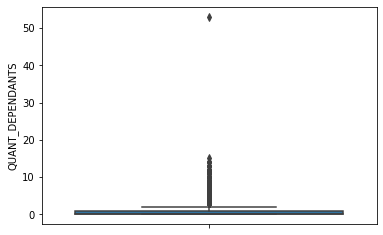

In [39]:
#verificar outlieres
sns.boxplot(y = data['QUANT_DEPENDANTS']);

In [37]:
data.query('QUANT_DEPENDANTS>=14')

,ID_CLIENT,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,NACIONALITY,FLAG_RESIDENCIAL_PHONE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,FLAG_PROFESSIONAL_PHONE,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,PRODUCT,AGE,TARGET_LABEL_BAD=1
9018,9019,20,0,1,F,1,14,1,N,1.0,40.0,0,350.0,0.0,0,0,0,0,0,1,1,0.0,1,N,N,0,9.0,1.0,1,84,1
15065,15066,5,Web,1,F,2,14,1,Y,1.0,0.0,1,521.0,0.0,1,1,0,0,0,0,0,0.0,0,Y,Y,0,9.0,2.0,1,48,0
19449,19450,10,0,1,F,4,15,1,N,1.0,20.0,1,308.0,0.0,0,0,0,0,0,0,0,0.0,0,N,N,0,NaN,1.0,1,65,0
27904,27905,10,Web,1,F,2,14,1,Y,1.0,NaN,1,350.0,0.0,0,0,0,0,0,0,0,0.0,0,N,N,0,9.0,1.0,1,62,0
40462,40463,20,0,1,F,2,53,1,Y,1.0,20.0,1,600.0,0.0,0,0,0,0,0,1,1,0.0,0,N,N,0,9.0,2.0,1,48,0


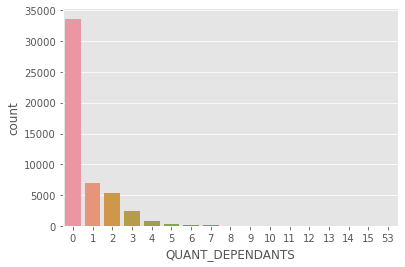

In [69]:
sns.countplot(data['QUANT_DEPENDANTS']);

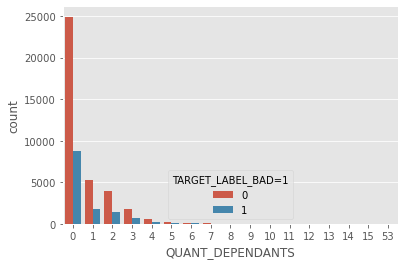

In [70]:
sns.countplot(data['QUANT_DEPENDANTS'], hue=data['TARGET_LABEL_BAD=1']);

**comentario**
- Se debe de reducir a si o no, dede si es todos los registros >=1 

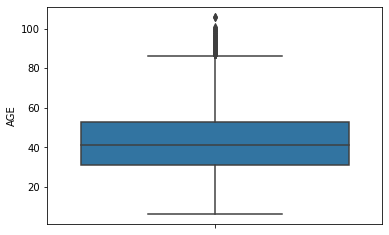

In [40]:
#verificar outlieres
sns.boxplot(y = data['AGE']);

In [55]:
data.query('AGE>=82')

,ID_CLIENT,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,NACIONALITY,FLAG_RESIDENCIAL_PHONE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,FLAG_PROFESSIONAL_PHONE,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,PRODUCT,AGE,TARGET_LABEL_BAD=1
62,63,25,0,1,F,1,0,1,N,1.0,5.0,0,422.00,0.0,0,0,0,0,0,1,1,0.0,1,N,N,0,0.0,1.0,1,84,1
104,105,5,Web,1,M,2,0,1,N,1.0,10.0,1,1530.79,0.0,1,0,0,0,0,1,1,0.0,0,N,N,0,9.0,1.0,1,92,1
133,134,5,Web,1,F,4,0,1,N,1.0,5.0,1,1240.00,0.0,0,0,0,0,0,0,0,0.0,0,N,N,0,NaN,1.0,1,91,1
256,257,10,0,1,F,4,0,1,N,1.0,10.0,0,450.00,0.0,0,0,0,0,0,1,1,0.0,1,N,N,0,9.0,1.0,1,91,1
588,589,5,0,1,F,2,0,1,Y,1.0,NaN,1,2355.00,0.0,0,0,0,0,0,1,1,0.0,0,Y,N,0,11.0,1.0,1,84,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49290,49291,1,0,1,M,2,0,1,N,1.0,45.0,0,350.00,0.0,0,0,0,0,0,1,1,0.0,1,Y,N,0,9.0,1.0,1,82,1
49316,49317,10,Web,1,F,4,0,2,Y,1.0,13.0,1,900.00,0.0,0,0,0,0,0,0,0,0.0,0,Y,N,0,NaN,NaN,1,83,0
49365,49366,10,Web,1,F,4,0,1,Y,1.0,24.0,1,493.00,0.0,0,0,0,0,0,0,0,0.0,0,N,N,0,NaN,NaN,1,82,0
49420,49421,10,Web,1,F,4,0,1,Y,1.0,1.0,1,357.35,0.0,0,0,0,0,0,0,0,0.0,0,N,N,0,NaN,1.0,1,86,0


In [42]:
data['AGE'].describe()

count    50000.00000
mean        43.24852
std         14.98905
min          6.00000
25%         31.00000
50%         41.00000
75%         53.00000
max        106.00000
Name: AGE, dtype: float64

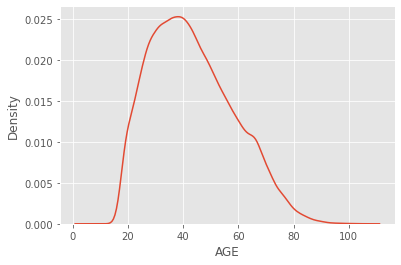

In [47]:
sns.kdeplot(data['AGE']);

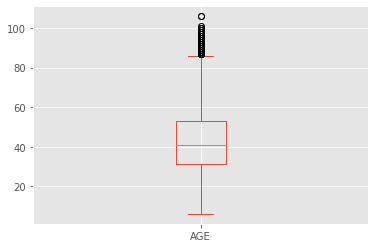

In [48]:
data['AGE'].plot(kind='box');

In [56]:
data.query('AGE<=17')

,ID_CLIENT,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,NACIONALITY,FLAG_RESIDENCIAL_PHONE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,FLAG_PROFESSIONAL_PHONE,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,PRODUCT,AGE,TARGET_LABEL_BAD=1
2449,2450,1,0,1,F,1,1,1,Y,1.0,18.0,0,700.00,0.0,0,0,0,0,0,1,1,0.0,1,N,N,0,2.0,4.0,1,17,0
3103,3104,10,Web,1,F,1,0,1,Y,1.0,1.0,1,380.00,0.0,0,0,0,0,0,0,0,0.0,0,Y,Y,0,11.0,5.0,2,17,1
5456,5457,5,Carga,1,M,1,0,1,Y,1.0,1.0,1,450.00,0.0,0,0,0,0,0,0,0,0.0,0,Y,N,0,9.0,2.0,1,17,0
5529,5530,5,0,1,M,2,0,1,Y,1.0,NaN,1,361.00,0.0,0,0,0,0,0,0,0,0.0,0,N,N,0,NaN,NaN,1,17,0
8384,8385,10,Web,1,F,1,0,1,N,5.0,1.0,1,350.00,0.0,0,0,0,0,0,0,0,0.0,0,Y,Y,0,9.0,2.0,1,17,0
11305,11306,15,Carga,1,F,1,0,1,Y,1.0,1.0,1,350.00,0.0,0,0,0,0,0,0,0,0.0,0,Y,Y,0,11.0,5.0,2,17,0
11860,11861,20,Web,1,M,2,0,1,Y,1.0,1.0,1,440.00,0.0,0,0,0,0,0,0,0,0.0,0,Y,Y,0,9.0,1.0,2,17,1
13158,13159,10,Web,1,F,1,0,1,Y,1.0,19.0,1,384.00,0.0,0,0,0,0,0,0,0,0.0,0,N,N,0,9.0,2.0,1,17,1
14500,14501,5,0,1,M,1,0,1,Y,1.0,2.0,1,400.00,0.0,0,0,0,0,0,1,1,0.0,1,N,N,0,9.0,2.0,1,17,0
18155,18156,25,Web,1,F,1,0,1,Y,1.0,6.0,1,406.78,0.0,0,0,0,0,0,0,0,0.0,0,Y,Y,0,9.0,2.0,1,17,1


Reducir la data tiene outliers personas por debajo de ser amyor de edad y personas que tienen mas de 106 años que aplicaraon para prestamos

In [58]:
#filtro selecciona solo los registros que cumplen con la condicion de la edad 
df1 = data.query('AGE>=18 & AGE <=80')

In [59]:
df1.shape

(49540, 31)

In [74]:
df1.shape

(49540, 31)

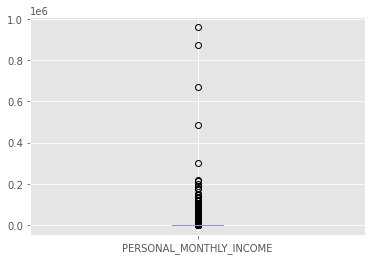

In [66]:
df1['PERSONAL_MONTHLY_INCOME'].plot(kind='box');

#### INGRESOS

In [67]:
df1['PERSONAL_MONTHLY_INCOME'].describe()

count     49540.000000
mean        889.443646
std        7882.823700
min          60.000000
25%         360.000000
50%         500.000000
75%         800.000000
max      959000.000000
Name: PERSONAL_MONTHLY_INCOME, dtype: float64

In [73]:
df1.query('PERSONAL_MONTHLY_INCOME<=100')

,ID_CLIENT,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,NACIONALITY,FLAG_RESIDENCIAL_PHONE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,FLAG_PROFESSIONAL_PHONE,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,PRODUCT,AGE,TARGET_LABEL_BAD=1
1039,1040,25,Web,1,F,2,1,1,N,1.0,38.0,1,100.0,0.0,0,0,0,0,0,0,0,0.0,0,N,N,0,2.0,4.0,1,53,0
3891,3892,25,Carga,1,F,1,1,1,Y,1.0,1.0,1,100.0,0.0,0,0,0,0,0,0,0,0.0,0,N,N,0,11.0,4.0,1,33,0
7894,7895,25,Carga,1,F,1,0,1,Y,1.0,1.0,1,100.0,0.0,0,0,0,0,0,0,0,0.0,0,N,N,0,9.0,4.0,1,57,0
8445,8446,10,Carga,1,F,1,0,1,Y,1.0,1.0,1,100.0,0.0,0,0,0,0,0,0,0,0.0,0,Y,N,0,9.0,4.0,1,36,0
9771,9772,15,Web,1,M,2,0,1,Y,1.0,1.0,1,100.0,0.0,0,0,0,0,0,0,0,0.0,0,Y,N,0,9.0,4.0,2,42,0
10418,10419,25,Carga,1,F,2,0,1,N,1.0,NaN,1,100.0,0.0,0,0,0,0,0,0,0,0.0,0,N,N,0,9.0,4.0,1,37,0
12708,12709,20,Web,1,F,1,0,1,Y,1.0,5.0,1,100.0,0.0,0,0,0,0,0,0,0,0.0,0,N,N,0,2.0,5.0,1,24,0
15891,15892,20,Carga,1,M,1,0,1,Y,1.0,1.0,1,100.0,0.0,0,0,0,0,0,0,0,0.0,0,Y,N,0,11.0,4.0,1,26,1
15912,15913,15,Web,1,M,2,0,1,Y,5.0,0.0,1,60.0,0.0,0,0,0,0,0,0,0,0.0,0,Y,N,0,9.0,2.0,1,53,0
16010,16011,15,0,1,F,3,0,1,N,2.0,NaN,1,100.0,0.0,0,0,0,0,0,1,1,0.0,0,Y,Y,0,11.0,2.0,1,54,1


In [77]:
df1['OTHER_INCOMES'].describe()

count     49540.000000
mean         35.509507
std         895.558440
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      194344.000000
Name: OTHER_INCOMES, dtype: float64

**Comentario**
- crear una columna nueva total income

In [76]:
df1.columns

Index(['ID_CLIENT', 'PAYMENT_DAY', 'APPLICATION_SUBMISSION_TYPE',
       'POSTAL_ADDRESS_TYPE', 'SEX', 'MARITAL_STATUS', 'QUANT_DEPENDANTS',
       'NACIONALITY', 'FLAG_RESIDENCIAL_PHONE', 'RESIDENCE_TYPE',
       'MONTHS_IN_RESIDENCE', 'FLAG_EMAIL', 'PERSONAL_MONTHLY_INCOME',
       'OTHER_INCOMES', 'FLAG_VISA', 'FLAG_MASTERCARD', 'FLAG_DINERS',
       'FLAG_AMERICAN_EXPRESS', 'FLAG_OTHER_CARDS', 'QUANT_BANKING_ACCOUNTS',
       'QUANT_SPECIAL_BANKING_ACCOUNTS', 'PERSONAL_ASSETS_VALUE', 'QUANT_CARS',
       'COMPANY', 'FLAG_PROFESSIONAL_PHONE', 'MONTHS_IN_THE_JOB',
       'PROFESSION_CODE', 'OCCUPATION_TYPE', 'PRODUCT', 'AGE',
       'TARGET_LABEL_BAD=1'],
      dtype='object')